![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

**The FinanceToolkit** is an open-source toolkit in which all relevant financial ratios (50+), indicators and performance measurements are written down in the most simplistic way allowing for complete transparency of the calculation method. This allows you to not have to rely on metrics from other providers and, given a financial statement, allow for efficient manual calculations. This leads to one uniform method of calculation being applied that is available and understood by everyone.

## Table of Contents

1. [Installation](#installation)
2. [The Toolkit Module](#the-toolkit-module)
3. [The Ratios Module](#the-ratios-module)
4. [The Models Module](#the-models-module)
5. [Calling Functions Directly](#calling-functions-directly)

# Installation
To install the FinanceToolkit it simply requires the following:

```
pip install financetoolkit -U
```

From within Python use:

```python
from financetoolkit import Toolkit
```
 
The dependencies of the package are on purpose *very slim* so that it will work well with any combination of packages and not result in conflicts. I've also been careful with my selection in which I leave out functionality like technical analysis in which [ta-lib](https://ta-lib.org/) does an excellent job as well as portfolio attribution and optimisation in which [Riskfolio-lib](https://riskfolio-lib.readthedocs.io/en/latest/index.html) shines and lastly allow for any source to be incorporated to allow for the incorporation of data sources from [OpenBB](https://openbb.co/).

In [1]:
import pandas as pd
import numpy as np

from financetoolkit import Toolkit

API_KEY = "FMP_KEY"

# The Toolkit Module

Initializing only is required once. This is the case for any function so once you have obtained a balance sheet statement, it will be stored accordingly which means that requests to FinancialModelingPrep, the source used in these examples, are kept to a minimum.

In [2]:
# Initialize the Toolkit with company tickers
companies = Toolkit(["AAPL", "MSFT", "GOOGL", "AMZN"], api_key=API_KEY)

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2023-07-06  191.809998  128.360001  120.110001  341.269989  191.809998   
2023-07-07  190.679993  129.779999  119.480003  337.220001  190.679993   
2023-07-10  188.610001  127.129997  116.449997  331.829987  188.610001   
2023-07-11  188.080002  128.779999  117.139999  332.470001  188.080002   
2023-07-12  189.770004  130.800003  118.930000  337.200012  189.770004   
2023-07-13  190.539993  134.300003  124.540001  342.660004  190.539993   
2023-07-14  190.690002  134.679993  125.419998  345.239990  190.690002   
2023-07-17  193.990005  133.559998  124.650002  345.730011  193.990005   
2023-07-18  193.729996  132.830002  123.760002  359.489990  193.729996   
2023-07-19  195.100006  135.360001  122.029999  355.079987  195.100006   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2023-07-06  128.360001  120.110001  341.269989  192.020004  128.729996  ...   
2023-07-07  129.779999  119.480003  337.220001  192.669998  130.970001  ...   
2023-07-10  127.129997  116.449997  331.829987  189.990005  129.279999  ...   
2023-07-11  128.779999  117.139999  332.470001  189.300003  129.770004  ...   
2023-07-12  130.800003  118.930000  337.200012  191.699997  131.259995  ...   
2023-07-13  134.300003  124.540001  342.660004  191.190002  134.669998  ...   
2023-07-14  134.679993  125.419998  345.239990  191.179993  136.649994  ...   
2023-07-17  133.559998  124.650002  345.730011  194.320007  135.619995  ...   
2023-07-18  132.830002  123.760002  359.489990  194.330002  133.860001  ...   
2023-07-19  135.360001  122.029999  355.079987  198.229996  135.990005  ...   

                   Low                    Open                          \
                 GOOGL        MSFT        AAPL        AMZN       GOOGL   
Date                                                                     
2023-07-06  118.400002  335.500000  189.839996  128.250000  119.800003   
2023-07-07  119.400002  337.000000  191.410004  128.589996  120.099998   
2023-07-10  116.139999  327.589996  189.259995  129.070007  118.300003   
2023-07-11  115.349998  327.000000  189.160004  127.750000  116.290001   
2023-07-12  118.410004  335.670013  189.679993  130.309998  118.800003   
2023-07-13  120.449997  339.019989  190.500000  134.039993  120.930000   
2023-07-14  123.489998  344.309998  190.229996  134.059998  124.800003   
2023-07-17  124.199997  342.200012  191.899994  134.559998  125.940002   
2023-07-18  122.959999  342.170013  193.350006  132.710007  124.599998   
2023-07-19  121.800003  352.440002  193.100006  133.389999  124.599998   

                          Volume                                  
                  MSFT      AAPL      AMZN       GOOGL      MSFT  
Date                                                              
2023-07-06  337.299988  45094300  40639900  24745200.0  28161200  
2023-07-07  339.320007  46778000  41928700  21692600.0  21185300  
2023-07-10  334.600006  59922200  61889300  35315200.0  32791400  
2023-07-11  331.059998  46638100  49951500  23078800.0  26698200  
2023-07-12  336.600006  60750200  54022800  30404400.0  29995300  
2023-07-13  339.559998  41342300  61170900  44297900.0  20567200  
2023-07-14  347.589996  41573900  54388100  33266800.0  28302200  
2023-07-17  345.679993  50520200  48450200  25716200.0  20363900  
2023-07-18  345.829987  48353800  54969100  26226400.0  64872700  
2023-07-19  361.750000  80292500  54297000  37134500.0  39640400  

[10 rows x 24 columns]

Adj Close                                           Close              \
            AAPL        AMZN       GOOGL        MSFT        AAPL        AMZN   
Date                                                                           
2014   24.767363   15.517500   26.533001   40.351376   27.594999   15.517500   
2015   24.020948   33.794498   38.900501   49.507843   26.315001   33.794498   
2016   27.018867   37.493500   39.622501   56.972515   28.955000   37.493500   
2017   40.113365   58.473499   52.669998   80.177750   42.307499   58.473499   
2018   37.951191   75.098503   52.248001   96.850967   39.435001   75.098503   
2019   71.711739   92.391998   66.969498  152.596542   73.412498   92.391998   
2020  130.735306  162.846497   87.632004  217.502029  132.690002  162.846497   
2021  176.032745  166.716995  144.852005  331.640442  177.570007  166.716995   
2022  129.552719   84.000000   88.230003  238.699020  129.929993   84.000000   
2023  195.100006  135.360001  122.029999  355.079987  195.100006  135.360001   

                                    High              ...         Low  \
           GOOGL        MSFT        AAPL        AMZN  ...       GOOGL   
Date                                                  ...               
2014   26.533001   46.450001   28.282499   15.649000  ...   26.510000   
2015   38.900501   55.480000   26.757500   34.387501  ...   38.866001   
2016   39.622501   62.139999   29.299999   38.369999  ...   39.480999   
2017   52.669998   85.540001   42.647499   59.200001  ...   52.634998   
2018   52.248001  101.570000   39.840000   76.038002  ...   51.652000   
2019   66.969498  157.699997   73.419998   92.663002  ...   66.606499   
2020   87.632004  222.419998  134.740005  164.145996  ...   86.804497   
2021  144.852005  336.320007  179.229996  169.350006  ...  144.852005   
2022   88.230003  239.820007  129.949997   84.050003  ...   86.570000   
2023  122.029999  355.079987  198.229996  135.990005  ...  121.800003   

                        Open                                         Volume  \
            MSFT        AAPL        AMZN       GOOGL        MSFT       AAPL   
Date                                                                          
2014   46.450001   28.205000   15.577500   26.886999   46.730000  165613600   
2015   55.419998   26.752501   34.304001   39.390999   56.040001  163649200   
2016   62.029999   29.162500   38.323502   40.160500   62.959999  122345200   
2017   85.500000   42.630001   59.117500   52.774502   85.629997  103999600   
2018  100.440002   39.632500   75.540001   52.891499  101.290001  140014000   
2019  156.449997   72.482498   92.099998   66.789497  156.770004  100805600   
2020  219.679993  134.080002  163.750000   86.863503  221.699997   99116600   
2021  335.850006  178.089996  168.955994  146.050003  338.510010   64062300   
2022  236.660004  128.410004   83.120003   86.980003  238.210007   77034200   
2023  352.440002  193.100006  133.389999  124.599998  361.750000   80292500   

                                       
           AMZN       GOOGL      MSFT  
Date                                   
2014   40960000  24648000.0  21552500  
2015   74992000  32752000.0  27334100  
2016   82788000  34718000.0  25579900  
2017   53768000  23606000.0  18717400  
2018  139090000  33110000.0  33173800  
2019   50130000  19514000.0  18369400  
2020   59144000  21070000.0  20942100  
2021   47830000  18136000.0  18000800  
2022   62401200  23986300.0  21938500  
2023   54297000  37134500.0  39640400  

[10 rows x 24 columns]

<Axes: xlabel='Date'>

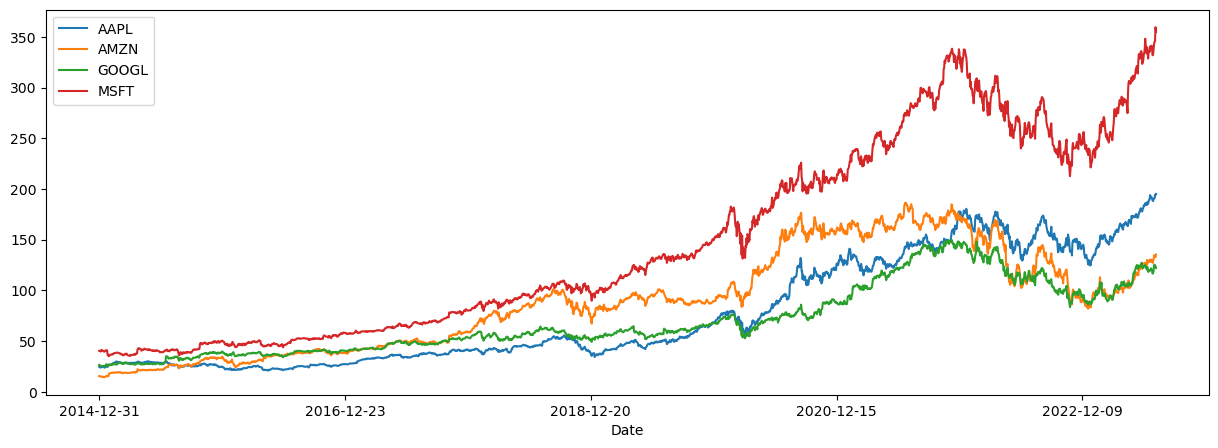

In [3]:
# Obtain daily historical data from each company
display(companies.get_historical_data(start="2000-01-01").tail(10))

# Obtain yearly historical data from each company
display(companies.get_historical_data(start="2010-01-01", period="yearly").tail(10))

# Plot the Adjusted Close Prices
companies.get_historical_data(start="2015-01-01")["Adj Close"].plot(figsize=(15, 5))

In [4]:
# Obtain the balance sheets from each company
companies.get_balance_sheet_statement()

date                                         1985         1986         1987  \
AAPL Cash and Cash Equivalents        337000000.0  576200000.0  565100000.0   
     Short Term Investments                   0.0          0.0          0.0   
     Cash and Short Term Investments  337000000.0  576200000.0  565100000.0   
     Accounts Receivable              220200000.0  263100000.0  405600000.0   
     Inventory                        167000000.0  108700000.0  225800000.0   
...                                           ...          ...          ...   
MSFT Minority Interest                        NaN          0.0          0.0   
     Total Liabilities and Equity             NaN  170700000.0  287800000.0   
     Total Investments                        NaN          0.0          0.0   
     Total Debt                               NaN    1900000.0    7100000.0   
     Net Debt                                 NaN -100800000.0 -125400000.0   

date                                         1988         1989          1990  \
AAPL Cash and Cash Equivalents        545700000.0  438300000.0  3.747000e+08   
     Short Term Investments                   0.0          0.0  0.000000e+00   
     Cash and Short Term Investments  545700000.0  438300000.0  3.747000e+08   
     Accounts Receivable              638800000.0  792800000.0  7.619000e+08   
     Inventory                        461500000.0  475400000.0  3.555000e+08   
...                                           ...          ...           ...   
MSFT Minority Interest                        0.0          0.0  0.000000e+00   
     Total Liabilities and Equity     493000000.0  720600000.0  1.105300e+09   
     Total Investments                        0.0          0.0  0.000000e+00   
     Total Debt                        20300000.0   25400000.0  6.500000e+06   
     Net Debt                        -162900000.0 -167000000.0 -2.398000e+08   

date                                          1991          1992  \
AAPL Cash and Cash Equivalents        6.041000e+08  4.986000e+08   
     Short Term Investments           0.000000e+00  0.000000e+00   
     Cash and Short Term Investments  6.041000e+08  4.986000e+08   
     Accounts Receivable              9.072000e+08  1.087200e+09   
     Inventory                        6.717000e+08  5.801000e+08   
...                                            ...           ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00   
     Total Liabilities and Equity     1.644200e+09  2.639900e+09   
     Total Investments                0.000000e+00  0.000000e+00   
     Total Debt                       1.950000e+07  8.300000e+06   
     Net Debt                        -3.977000e+08 -7.831000e+08   

date                                          1993          1994  ...  \
AAPL Cash and Cash Equivalents        6.764000e+08  1.203488e+09  ...   
     Short Term Investments           0.000000e+00  5.436800e+07  ...   
     Cash and Short Term Investments  6.764000e+08  1.257856e+09  ...   
     Accounts Receivable              1.381900e+09  1.581347e+09  ...   
     Inventory                        1.506600e+09  1.088434e+09  ...   
...                                            ...           ...  ...   
MSFT Minority Interest                0.000000e+00  0.000000e+00  ...   
     Total Liabilities and Equity     3.805000e+09  5.363000e+09  ...   
     Total Investments                0.000000e+00  0.000000e+00  ...   
     Total Debt                       0.000000e+00  0.000000e+00  ...   
     Net Debt                        -1.013000e+09 -1.477000e+09  ...   

date                                          2013          2014  \
AAPL Cash and Cash Equivalents        1.425900e+10  1.384400e+10   
     Short Term Investments           2.628700e+10  1.123300e+10   
     Cash and Short Term Investments  4.054600e+10  2.507700e+10   
     Accounts Receivable              2.064100e+10  2.721900e+10   
     Inventory                        1.764000e+09  2.11

In [5]:
# Obtain the income statements from each company
companies.get_income_statement()

date                                            1985          1986  \
AAPL Revenue                            1.918300e+09  1.901900e+09   
     Cost of Goods Sold                 1.076000e+09  8.400000e+08   
     Gross Profit                       8.423000e+08  1.061900e+09   
     Gross Profit Ratio                 4.390867e-01  5.583364e-01   
     Research and Development Expenses  0.000000e+00  0.000000e+00   
...                                              ...           ...   
MSFT Net Income Ratio                            NaN  1.989873e-01   
     EPS                                         NaN  5.352473e-03   
     EPS Diluted                                 NaN  5.352473e-03   
     Weighted Average Shares                     NaN  7.342400e+09   
     Weighted Average Shares Diluted             NaN  7.342400e+09   

date                                            1987          1988  \
AAPL Revenue                            2.661100e+09  4.071400e+09   
     Cost of Goods Sold                 1.225700e+09  1.913200e+09   
     Gross Profit                       1.435400e+09  2.158200e+09   
     Gross Profit Ratio                 5.394010e-01  5.300879e-01   
     Research and Development Expenses  0.000000e+00  0.000000e+00   
...                                              ...           ...   
MSFT Net Income Ratio                   2.078635e-01  2.097156e-01   
     EPS                                1.000000e-02  2.000000e-02   
     EPS Diluted                        1.000000e-02  2.000000e-02   
     Weighted Average Shares            7.190000e+09  6.195000e+09   
     Weighted Average Shares Diluted    7.190000e+09  6.195000e+09   

date                                            1989          1990  \
AAPL Revenue                            5.284000e+09  5.558400e+09   
     Cost of Goods Sold                 2.570000e+09  2.403500e+09   
     Gross Profit                       2.714000e+09  3.154900e+09   
     Gross Profit Ratio                 5.136260e-01  5.675914e-01   
     Research and Development Expenses  0.000000e+00  0.000000e+00   
...                                              ...           ...   
MSFT Net Income Ratio                   2.121966e-01  2.359304e-01   
     EPS                                2.500000e-02  3.500000e-02   
     EPS Diluted                        2.500000e-02  3.500000e-02   
     Weighted Average Shares            6.820000e+09  7.977143e+09   
     Weighted Average Shares Diluted    6.820000e+09  7.977143e+09   

date                                            1991          1992  \
AAPL Revenue                            6.308800e+09  7.086500e+09   
     Cost of Goods Sold                 3.109700e+09  3.774200e+09   
     Gross Profit                       3.199100e+09  3.312300e+09   
     Gross Profit Ratio                 5.070853e-01  4.674099e-01   
     Research and Development Expenses  0.000000e+00  0.000000e+00   
...                                              ...           ...   
MSFT Net Income Ratio                   2.510036e-01  2.566789e-01   
     EPS                                5.500000e-02  8.000000e-02   
     EPS Diluted                        5.500000e-02  8.000000e-02   
     Weighted Average Shares            8.412727e+09  8.851250e+09   
     Weighted Average Shares Diluted    8.412727e+09  8.851250e+09   

date                                            1993          1994  ...  \
AAPL Revenue                            7.977000e+09  9.188748e+09  ...   
     Cost of Goods Sold                 5.082700e+09  6.844915e+09  ...   
     Gross Profit                       2.894300e+09  2.343833e+09  ...   
     Gross Profit Ratio                 3.628306e-01  2.550764e-01  ...   
     Research and Development Expenses  0.000000e+00  5.643030e+08  ...   
...                                              ...           ...  ...   
MSFT Net Income Ratio                   2.539302e-01  2.465046e-01  ...   
     EPS                            

In [6]:
# Obtain the cash flow statements from each company
companies.get_cash_flow_statement()

date                                       1989         1990         1991  \
AAPL Net Income                     454000000.0  474900000.0  309800000.0   
     Depreciation and Amortization  124800000.0  202700000.0  204400000.0   
     Deferred Income Tax            111300000.0  138900000.0    8000000.0   
     Stock Based Compensation               0.0          0.0          0.0   
     Change in Working Capital     -109000000.0  145300000.0 -400700000.0   
...                                         ...          ...          ...   
MSFT Cash End of Period                     0.0          0.0          0.0   
     Cash Beginning of Period        90500000.0  192400000.0  246300000.0   
     Operating Cash Flow            222500000.0  278300000.0  557900000.0   
     Capital Expenditure            -89400000.0 -158100000.0 -264400000.0   
     Free Cash Flow                 133100000.0  120200000.0  293500000.0   

date                                       1992          1993          1994  \
AAPL Net Income                     530400000.0  8.660000e+07  3.101780e+08   
     Depreciation and Amortization  217200000.0  1.661000e+08  1.679580e+08   
     Deferred Income Tax            100900000.0  1.900000e+07  4.080000e+07   
     Stock Based Compensation               0.0  0.000000e+00  0.000000e+00   
     Change in Working Capital       20700000.0 -9.467000e+08  2.477290e+08   
...                                         ...           ...           ...   
MSFT Cash End of Period                     0.0  0.000000e+00  0.000000e+00   
     Cash Beginning of Period       417200000.0  7.910000e+08  1.013000e+09   
     Operating Cash Flow            907000000.0  1.074000e+09  1.593000e+09   
     Capital Expenditure           -316600000.0 -2.360000e+08 -2.780000e+08   
     Free Cash Flow                 590400000.0  8.380000e+08  1.315000e+09   

date                                        1995          1996          1997  \
AAPL Net Income                     4.240000e+08 -8.160000e+08 -1.045000e+09   
     Depreciation and Amortization  1.270000e+08  1.560000e+08  1.180000e+08   
     Deferred Income Tax            7.300000e+07 -4.390000e+08 -7.000000e+06   
     Stock Based Compensation       0.000000e+00  0.000000e+00  0.000000e+00   
     Change in Working Capital     -7.970000e+08  1.109000e+09  6.700000e+08   
...                                          ...           ...           ...   
MSFT Cash End of Period             0.000000e+00  0.000000e+00  0.000000e+00   
     Cash Beginning of Period       1.477000e+09  1.962000e+09  2.601000e+09   
     Operating Cash Flow            1.990000e+09  3.719000e+09  4.689000e+09   
     Capital Expenditure           -4.950000e+08 -4.940000e+08 -4.990000e+08   
     Free Cash Flow                 1.495000e+09  3.225000e+09  4.190000e+09   

date                                        1998  ...          2013  \
AAPL Net Income                     3.090000e+08  ...  3.703700e+10   
     Depreciation and Amortization  1.110000e+08  ...  6.757000e+09   
     Deferred Income Tax            1.000000e+06  ...  1.141000e+09   
     Stock Based Compensation       0.000000e+00  ...  2.253000e+09   
     Change in Working Capital      3.870000e+08  ...  6.478000e+09   
...                                          ...  ...           ...   
MSFT Cash End of Period             3.839000e+09  ...  3.804000e+09   
     Cash Beginning of Period       3.706000e+09  ...  6.938000e+09   
     Operating Cash Flow            6.880000e+09  ...  2.883300e+10   
     Capital Expenditure           -6.560000e+08  ... -4.257000e+09   
     Free Cash Flow                 6.224000e+09  ...  2.457600e+10   

date                                        2014          2015          2016  \
AAPL Net Income                     3.951000e+10  5.339400e+10  4.568700e+10   
     Depreciation and Amortization  7.946000e+09  1.125700e+10  1.050500e+10   
     Deferred Income Tax            2.347000e+09  1.382000e+09  4.938000

With this structure, it is easy to select and plot specific companies, financial statement items and/or years. See some examples below.

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Cash and Cash Equivalents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.658000e+09,1.455700e+10,1.589000e+10,1.933400e+10,2.052200e+10,3.175000e+10,3.609200e+10,4.212200e+10,3.622000e+10,5.388800e+10
Short Term Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.789000e+09,2.859000e+09,3.918000e+09,6.647000e+09,1.046400e+10,9.500000e+09,1.892900e+10,4.227400e+10,5.982900e+10,1.613800e+10
Cash and Short Term Investments,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.244700e+10,1.741600e+10,1.980800e+10,2.598100e+10,3.098600e+10,4.125000e+10,5.502100e+10,8.439600e+10,9.604900e+10,7.002600e+10
Accounts Receivable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.767000e+09,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10
Inventory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.411000e+09,8.299000e+09,1.024300e+10,1.146100e+10,1.604700e+10,1.717400e+10,2.049700e+10,2.379500e+10,3.264000e+10,3.440500e+10


date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,220200000.0,263100000.0,405600000.0,638800000.0,792800000.0,761900000.0,907200000.0,1.087200e+09,1.381900e+09,1.581347e+09,...,2.064100e+10,2.721900e+10,3.034300e+10,2.929900e+10,3.567300e+10,4.899500e+10,4.580400e+10,3.744500e+10,5.150600e+10,6.093200e+10
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.767000e+09,5.612000e+09,6.423000e+09,8.339000e+09,1.316400e+10,1.667700e+10,2.081600e+10,2.454200e+10,3.289100e+10,4.236000e+10
GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.390000e+09,1.155600e+10,1.390900e+10,1.423200e+10,1.870500e+10,2.119300e+10,2.749200e+10,3.138400e+10,4.027000e+10,4.025800e+10
MSFT,NaN,34500000.0,55100000.0,93600000.0,111200000.0,181000000.0,243300000.0,8.237000e+08,3.380000e+08,4.750000e+08,...,1.748600e+10,1.954400e+10,1.790800e+10,1.827700e+10,1.979200e+10,2.648100e+10,2.952400e+10,3.201100e+10,3.804300e+10,4.426100e+10


<Axes: >

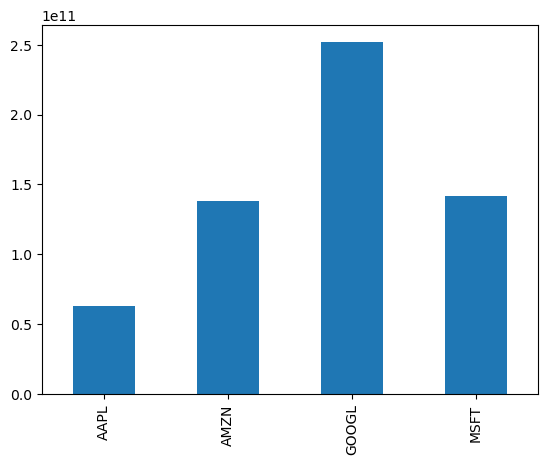

In [7]:
# Save to a variable for easier access
balance_sheet = companies.get_balance_sheet_statement()

# Show only the balance sheet statement for Amazon (purposely cut off to keep it compact)
display(balance_sheet.loc["AMZN"].head())

# Show the growth of the Accounts Receivable for each company
display(balance_sheet.loc[:, "Accounts Receivable", :])

# Plot the value of Total Shareholder Equity for each company in 2021
balance_sheet.loc[:, "Total Shareholder Equity", :]['2021'].plot(kind="bar")

There are several other functionalities within the `Toolkit` class which includes observing company profiles, company quotes, enterprise values and ratings. For example, after initialization you can call the functionality `get_profile`.

In [8]:
companies.get_profile()

,AAPL,MSFT,GOOGL,AMZN
symbol,AAPL,MSFT,GOOGL,AMZN
price,195.1,355.08,122.03,135.36
beta,1.292349,0.91086,1.052595,1.257855
volAvg,56698527,28142504,33565080,62957842
mktCap,3068669451162,2640193715343,1551013545100,1388847761326
lastDiv,0.96,2.72,0,0.2
range,124.17-198.22,213.43-366.78,83.34-129.04,81.43-146.57
changes,1.37,-4.41,-1.73,2.53
companyName,Apple Inc.,Microsoft Corporation,Alphabet Inc.,"Amazon.com, Inc."
currency,USD,USD,USD,USD


# The Ratios Module

After initialization of `Toolkit`, you can get access to the Ratios module which includes over 50 different ratios. This can be done by calling the `ratios` property.

In [9]:
ratios = companies.ratios

help(ratios)

Help on Ratios in module financetoolkit.base.ratios_controller object:

class Ratios(builtins.object)
 |  Ratios(tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |  
 |  Ratios Controller Class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tickers: str | list[str], historical: pandas.core.frame.DataFrame, balance: pandas.core.frame.DataFrame, income: pandas.core.frame.DataFrame, cash: pandas.core.frame.DataFrame)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  collect_all_ratios(self, include_dividends: bool = False, diluted: bool = True, days: int = 365)
 |      Calculates all Ratios based on the data provided.
 |  
 |  collect_efficiency_ratios(self, days: int = 365)
 |      Calculates all Efficiency Ratios based on the data provided.
 |  
 |  collect_liquidity_ratios(self) -> pandas.core.frame.DataFrame
 |      Calc

Within this ratios module, the distinction is made between `collect_` and `get_`. The former obtains a collection of ratios (e.g. all solvency ratios) whereas the latter obtains a specific ratio.

In [10]:
ratios.collect_valuation_ratios()

1985          1986          1987  \
AAPL Earnings per Share (EPS)        0.004464  1.071429e-02  1.482143e-02   
     Revenue per Share (RPS)         0.139932  1.323214e-01  1.813393e-01   
     Price-to-Earnings (PE)               NaN           NaN           NaN   
     Earnings per Share Growth            NaN  1.400000e+00  3.833333e-01   
     Price-to-Earnings-Growth (PEG)       NaN           NaN           NaN   
...                                       ...           ...           ...   
MSFT EV-to-EBIT                           NaN           NaN           NaN   
     EV-to-EBITDA                         NaN           NaN           NaN   
     EV-to-Operating-Cash-Flow            NaN           NaN           NaN   
     Tangible Asset Value                 NaN  1.393000e+08  2.391000e+08   
     Net Current Asset Value              NaN  1.185000e+08  1.664000e+08   

                                             1988          1989          1990  \
AAPL Earnings per Share (EPS)        2.750000e-02  3.160714e-02  3.375000e-02   
     Revenue per Share (RPS)         2.796990e-01  3.678682e-01  3.950221e-01   
     Price-to-Earnings (PE)                   NaN           NaN           NaN   
     Earnings per Share Growth       8.554217e-01  1.493506e-01  6.779661e-02   
     Price-to-Earnings-Growth (PEG)           NaN           NaN           NaN   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                               NaN           NaN           NaN   
     EV-to-EBITDA                             NaN           NaN           NaN   
     EV-to-Operating-Cash-Flow                NaN           NaN           NaN   
     Tangible Asset Value            3.755000e+08  5.618000e+08  9.186000e+08   
     Net Current Asset Value         2.277000e+08  3.101000e+08  5.331000e+08   

                                             1991          1992          1993  \
AAPL Earnings per Share (EPS)        2.303571e-02  3.863177e-02  6.451132e-03   
     Revenue per Share (RPS)         4.691017e-01  5.161464e-01  5.942342e-01   
     Price-to-Earnings (PE)                   NaN           NaN           NaN   
     Earnings per Share Growth      -3.174603e-01  6.770381e-01 -8.330097e-01   
     Price-to-Earnings-Growth (PEG)           NaN           NaN           NaN   
...                                           ...           ...           ...   
MSFT EV-to-EBIT                               NaN           NaN           NaN   
     EV-to-EBITDA                             NaN           NaN           NaN   
     EV-to-Operating-Cash-Flow                NaN           NaN           NaN   
     Tangible Asset Value            1.350800e+09  2.193000e+09  3.242000e+09   
     Net Current Asset Value         7.351000e+08  1.322800e+09  2.287000e+09   

                                             1994  ...          2013  \
AAPL Earnings per Share (EPS)        2.332460e-02  ...  1.419775e+00   
     Revenue per Share (RPS)         6.909706e-01  ...  6.551656e+00   
     Price-to-Earnings (PE)                   NaN  ...  1.240525e+01   
     Earnings per Share Growth       2.615582e+00  ... -9.948129e-02   
     Price-to-Earnings-Growth (PEG)           NaN  ...  8.737479e+00   
...                                           ...  ...           ...   
MSFT EV-to-EBIT                               NaN  ...  1.017866e+01   
     EV-to-EBITDA                             NaN  ...  9.165433e+00   
     EV-to-Operating-Cash-Flow                NaN  ...  9.701379e+00   
     Tangible Asset Value            4.450000e+09  ...  6.428900e+10   
     Net Current Asset Value         3.399000e+09  ...  6.404900e+10   

                                             2014          2015          2016  \
AAPL Earnings per Share (EPS)        1.613269e+00  2.304219e+00  2.076576e+00   
     Revenue per Share (RPS)         7.463868e+00  1.008598e+01  9.801272e+00   
     Price-to-Earnings (PE)          1.535229e+01  1.042477e+0

In [11]:
ratios.get_effective_tax_rate()

date,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
AAPL,0.49,0.502905,0.470029,0.389973,0.390031,0.389981,0.380028,0.380012,0.380100,0.379999,...,0.261549,0.261261,0.263683,0.255573,0.245565,0.183422,0.159438,0.144282,0.133023,0.162045
AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318182,-1.504505,0.605867,0.366136,0.202049,0.106296,0.169863,0.118413,0.125580,0.541947
GOOGL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.157423,0.193001,0.168083,0.193458,0.534365,0.119640,0.133300,0.162493,0.162023,0.159208
MSFT,NaN,0.404545,0.407743,0.325531,0.320175,0.320019,0.310021,0.319985,0.319772,0.334495,...,0.191816,0.206542,0.341168,0.149511,0.084021,0.545676,0.101813,0.165077,0.138266,0.131134


Some of these ratios also include optional fields depending on whether there is room for different methods of calculation. E.g. whether you'd like to have the diluted average shares included in the calculation.

In [12]:
ratios.collect_solvency_ratios(diluted=False)

1985      1986      1987      1988  \
AAPL  Debt-to-Assets Ratio           0.000000  0.000000  0.000000  0.061428   
      Debt-to-Equity Ratio           0.000000  0.000000  0.000000  0.127467   
      Interest Coverage Ratio        3.469725 -4.477241 -5.681234 -9.735007   
      Debt Service Coverage Ratio    0.498646  0.832572  0.776060  0.749970   
      Equity Multiplier                   NaN  1.684316  1.723507  1.934888   
      Free Cash Flow Yield                NaN       NaN       NaN       NaN   
      Net-Debt to EBITDA Ratio      -1.782126 -1.775108 -1.278507 -0.598567   
      Cash Flow Coverage Ratio            NaN       NaN       NaN       NaN   
      CAPEX Coverage Ratio                NaN       NaN       NaN       NaN   
      Dividend CAPEX Coverage Ratio       NaN       NaN       NaN       NaN   
AMZN  Debt-to-Assets Ratio                NaN       NaN       NaN       NaN   
      Debt-to-Equity Ratio                NaN       NaN       NaN       NaN   
      Interest Coverage Ratio             NaN       NaN       NaN       NaN   
      Debt Service Coverage Ratio         NaN       NaN       NaN       NaN   
      Equity Multiplier                   NaN       NaN       NaN       NaN   
      Free Cash Flow Yield                NaN       NaN       NaN       NaN   
      Net-Debt to EBITDA Ratio            NaN       NaN       NaN       NaN   
      Cash Flow Coverage Ratio            NaN       NaN       NaN       NaN   
      CAPEX Coverage Ratio                NaN       NaN       NaN       NaN   
      Dividend CAPEX Coverage Ratio       NaN       NaN       NaN       NaN   
GOOGL Debt-to-Assets Ratio                NaN       NaN       NaN       NaN   
      Debt-to-Equity Ratio                NaN       NaN       NaN       NaN   
      Interest Coverage Ratio             NaN       NaN       NaN       NaN   
      Debt Service Coverage Ratio         NaN       NaN       NaN       NaN   
      Equity Multiplier                   NaN       NaN       NaN       NaN   
      Free Cash Flow Yield                NaN       NaN       NaN       NaN   
      Net-Debt to EBITDA Ratio            NaN       NaN       NaN       NaN   
      Cash Flow Coverage Ratio            NaN       NaN       NaN       NaN   
      CAPEX Coverage Ratio                NaN       NaN       NaN       NaN   
      Dividend CAPEX Coverage Ratio       NaN       NaN       NaN       NaN   
MSFT  Debt-to-Assets Ratio                NaN  0.011131  0.024670  0.041176   
      Debt-to-Equity Ratio                NaN  0.013640  0.029695  0.054061   
      Interest Coverage Ratio             NaN       inf       inf       inf   
      Debt Service Coverage Ratio         NaN  2.064407  2.723176  1.593537   
      Equity Multiplier                   NaN       NaN  1.211681  1.270420   
      Free Cash Flow Yield                NaN       NaN       NaN       NaN   
      Net-Debt to EBITDA Ratio            NaN -1.511244 -0.932342 -0.800885   
      Cash Flow Coverage Ratio            NaN       NaN       NaN       NaN   
      CAPEX Coverage Ratio                NaN       NaN       NaN       NaN   
      Dividend CAPEX Coverage Ratio       NaN       NaN       NaN       NaN   

                                         1989      1990      1991       1992  \
AAPL  Debt-to-Assets Ratio           0.020700  0.041200  0.042535   0.043682   
      Debt-to-Equity Ratio           0.038231  0.084739  0.084112   0.084347   
      Interest Coverage Ratio       -3.450455 -6.877444 -6.218511 -10.290744   
      Debt Service Coverage Ratio    0.708478  0.693281  0.367513   0.565205   
      Equity Multiplier              1.938853  1.950418  2.013163   1.951721   
      Free Cash Flow Yield                NaN       NaN       NaN        NaN   
      Net-Debt to EBITDA Ratio      -0.502569 -0.275609 -0.698941  -0.307068   
      Cash Flow Coverage Ratio            NaN       NaN       NaN        NaN   
      CAPEX Coverage Ratio          -2.122594 -4.297370 -0.589556  -4.534120   
 

There is also an option to show all ratios if desired. Since each `collect` function depends on the `get` functions, these will always have the same result.

In [13]:
ratios.collect_all_ratios()

1985          1986  \
AAPL Days of Inventory Outstanding (DIO)          NaN  5.989911e+01   
     Days of Sales Outstanding (DSO)              NaN  4.637586e+01   
     Operating Cycle (CC)                         NaN  1.062750e+02   
     Days of Accounts Payable Outstanding (DPO)   NaN  0.000000e+00   
     Cash Conversion Cycle (CCC)                  NaN  1.062750e+02   
...                                               ...           ...   
MSFT EV-to-EBIT                                   NaN           NaN   
     EV-to-EBITDA                                 NaN           NaN   
     EV-to-Operating-Cash-Flow                    NaN           NaN   
     Tangible Asset Value                         NaN  1.393000e+08   
     Net Current Asset Value                      NaN  1.185000e+08   

                                                         1987          1988  \
AAPL Days of Inventory Outstanding (DIO)         4.980521e+01  6.556149e+01   
     Days of Sales Outstanding (DSO)             4.585989e+01  4.681510e+01   
     Operating Cycle (CC)                        9.566510e+01  1.123766e+02   
     Days of Accounts Payable Outstanding (DPO)  0.000000e+00  0.000000e+00   
     Cash Conversion Cycle (CCC)                 9.566510e+01  1.123766e+02   
...                                                       ...           ...   
MSFT EV-to-EBIT                                           NaN           NaN   
     EV-to-EBITDA                                         NaN           NaN   
     EV-to-Operating-Cash-Flow                            NaN           NaN   
     Tangible Asset Value                        2.391000e+08  3.755000e+08   
     Net Current Asset Value                     1.664000e+08  2.277000e+08   

                                                         1989          1990  \
AAPL Days of Inventory Outstanding (DIO)         6.653084e+01  6.309101e+01   
     Days of Sales Outstanding (DSO)             4.944493e+01  5.104576e+01   
     Operating Cycle (CC)                        1.159758e+02  1.141368e+02   
     Days of Accounts Payable Outstanding (DPO)  2.373210e+01  5.123819e+01   
     Cash Conversion Cycle (CCC)                 9.224366e+01  6.289858e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                           NaN           NaN   
     EV-to-EBITDA                                         NaN           NaN   
     EV-to-Operating-Cash-Flow                            NaN           NaN   
     Tangible Asset Value                        5.618000e+08  9.186000e+08   
     Net Current Asset Value                     3.101000e+08  5.331000e+08   

                                                         1991          1992  \
AAPL Days of Inventory Outstanding (DIO)         6.028363e+01  6.053031e+01   
     Days of Sales Outstanding (DSO)             4.828347e+01  5.136217e+01   
     Operating Cycle (CC)                        1.085671e+02  1.118925e+02   
     Days of Accounts Payable Outstanding (DPO)  4.094615e+01  3.791002e+01   
     Cash Conversion Cycle (CCC)                 6.762095e+01  7.398246e+01   
...                                                       ...           ...   
MSFT EV-to-EBIT                                           NaN           NaN   
     EV-to-EBITDA                                         NaN           NaN   
     EV-to-Operating-Cash-Flow                            NaN           NaN   
     Tangible Asset Value                        1.350800e+09  2.193000e+09   
     Net Current Asset Value                     7.351000e+08  1.322800e+09   

                                                         1993          1994  \
AAPL Days of Inventory Outstanding (DIO)         7.492529e+01  6.918913e+01   
     Days of Sales Outstanding (DSO)             5.648875e+01  5.885378e+01   
     Operating Cycle (CC)                        1.314140e+02  1.280429e+02   
     Days of Accounts Payable Out

# The Models Module

After initialization of `Toolkit`, you can get access to the Models module which includes a variety of well-known models. This can be done by calling the `models` property.

In [14]:
models = companies.models

It is possible to perform an (extended) Dupont analysis for each company.

In [15]:
models.get_dupont_analysis()

date                         1985      1986      1987      1988      1989  \
AAPL  Net Profit Margin  0.031903  0.080972  0.081733  0.098320  0.085920   
      Asset Turnover          NaN  1.814530  2.017513  2.287303  2.189805   
      Equity Multiplier       NaN  1.684316  1.723507  1.934888  1.938853   
      Return on Equity        NaN  0.247469  0.284202  0.435132  0.364790   
AMZN  Net Profit Margin       NaN       NaN       NaN       NaN       NaN   
      Asset Turnover          NaN       NaN       NaN       NaN       NaN   
      Equity Multiplier       NaN       NaN       NaN       NaN       NaN   
      Return on Equity        NaN       NaN       NaN       NaN       NaN   
GOOGL Net Profit Margin       NaN       NaN       NaN       NaN       NaN   
      Asset Turnover          NaN       NaN       NaN       NaN       NaN   
      Equity Multiplier       NaN       NaN       NaN       NaN       NaN   
      Return on Equity        NaN       NaN       NaN       NaN       NaN   
MSFT  Net Profit Margin       NaN  0.198987  0.207864  0.209716  0.212197   
      Asset Turnover          NaN       NaN  1.508833  1.513320  1.324160   
      Equity Multiplier       NaN       NaN  1.211681  1.270420  1.294783   
      Return on Equity        NaN       NaN  0.380021  0.403189  0.363811   

date                         1990      1991      1992      1993      1994  \
AAPL  Net Profit Margin  0.085438  0.049106  0.074847  0.010856  0.033756   
      Asset Turnover     1.943632  1.950381  1.836523  1.698119  1.754558   
      Equity Multiplier  1.950418  2.013163  1.951721  2.229603  2.375251   
      Return on Equity   0.323887  0.192812  0.268278  0.041103  0.140680   
AMZN  Net Profit Margin       NaN       NaN       NaN       NaN       NaN   
      Asset Turnover          NaN       NaN       NaN       NaN       NaN   
      Equity Multiplier       NaN       NaN       NaN       NaN       NaN   
      Return on Equity        NaN       NaN       NaN       NaN       NaN   
GOOGL Net Profit Margin       NaN       NaN       NaN       NaN       NaN   
      Asset Turnover          NaN       NaN       NaN       NaN       NaN   
      Equity Multiplier       NaN       NaN       NaN       NaN       NaN   
      Return on Equity        NaN       NaN       NaN       NaN       NaN   
MSFT  Net Profit Margin  0.235930  0.251004  0.256679  0.253930  0.246505   
      Asset Turnover     1.296237  1.340898  1.287878  1.164642  1.014180   
      Equity Multiplier  1.233383  1.211554  1.208900  1.185814  1.191888   
      Return on Equity   0.377195  0.407773  0.399628  0.350690  0.297972   

date                     ...      2013      2014      2015      2016  \
AAPL  Net Profit Margin  ...  0.216705  0.216144  0.228458  0.211868   
      Asset Turnover     ...  0.892331  0.833085  0.894915  0.704513   
      Equity Multiplier  ...  1.584487  1.866637  2.262077  2.472355   
      Return on Equity   ...  0.306396  0.336118  0.462482  0.369033   
AMZN  Net Profit Margin  ...  0.003680 -0.002708  0.005570  0.017435   
      Asset Turnover     ...  2.047804  1.880081  1.784192  1.827217   
      Equity Multiplier  ...  4.053629  4.620686  4.971979  4.556185   
      Return on Equity   ...  0.030550 -0.023527  0.049409  0.145153   
GOOGL Net Profit Margin  ...  0.215963  0.218845  0.218005  0.215770   
      Asset Turnover     ...  0.584463  0.545343  0.538339  0.573232   
      Equity Multiplier  ...  1.287340  1.261948  1.239126  1.214333   
      Return on Equity   ...  0.162491  0.150608  0.145425  0.150196   
MSFT  Net Profit Margin  ...  0.280839  0.254212  0.130295  0.196882   
      Asset Turnover     ...  0.590432  0.551645  0.536880  0.461293   
      Equity Multiplier  ...  1.814792  1.865814  2.052235  2.432384   
      Return on Equity   ...  0.300921  0.261652  0.143559  0.220910   

date                         2017      2018      2019      2020      2021  \
AAPL  Net Profit Margin  0.210924  0.224142  0.212381  0.209136  0.258818   
 

In [16]:
models.get_extended_dupont_analysis()

date                               1985      1986      1987      1988  \
AAPL  Interest Burden Ratio    1.227500  0.882828  0.905214  0.945291   
      Tax Burden Ratio         0.415479  0.563071  0.585464  0.645333   
      Operating Profit Margin  0.062555  0.162890  0.154222  0.161173   
      Asset Turnover                NaN  1.814530  2.017513  2.287303   
      Equity Multiplier             NaN  1.684316  1.723507  1.934888   
      Return on Equity              NaN  0.247469  0.284202  0.435132   
AMZN  Interest Burden Ratio         NaN       NaN       NaN       NaN   
      Tax Burden Ratio              NaN       NaN       NaN       NaN   
      Operating Profit Margin       NaN       NaN       NaN       NaN   
      Asset Turnover                NaN       NaN       NaN       NaN   
      Equity Multiplier             NaN       NaN       NaN       NaN   
      Return on Equity              NaN       NaN       NaN       NaN   
GOOGL Interest Burden Ratio         NaN       NaN       NaN       NaN   
      Tax Burden Ratio              NaN       NaN       NaN       NaN   
      Operating Profit Margin       NaN       NaN       NaN       NaN   
      Asset Turnover                NaN       NaN       NaN       NaN   
      Equity Multiplier             NaN       NaN       NaN       NaN   
      Return on Equity              NaN       NaN       NaN       NaN   
MSFT  Interest Burden Ratio         NaN  0.922727  1.045305  1.020142   
      Tax Burden Ratio              NaN  0.645320  0.566588  0.661153   
      Operating Profit Margin       NaN  0.334177  0.350968  0.310934   
      Asset Turnover                NaN       NaN  1.508833  1.513320   
      Equity Multiplier             NaN       NaN  1.211681  1.270420   
      Return on Equity              NaN       NaN  0.380021  0.403189   

date                               1989      1990      1991      1992  \
AAPL  Interest Burden Ratio    0.852210  0.914579  0.895137  0.941788   
      Tax Burden Ratio         0.715750  0.666994  0.692600  0.658310   
      Operating Profit Margin  0.140859  0.140058  0.079207  0.120723   
      Asset Turnover           2.189805  1.943632  1.950381  1.836523   
      Equity Multiplier        1.938853  1.950418  2.013163  1.951721   
      Return on Equity         0.364790  0.323887  0.192812  0.268278   
AMZN  Interest Burden Ratio         NaN       NaN       NaN       NaN   
      Tax Burden Ratio              NaN       NaN       NaN       NaN   
      Operating Profit Margin       NaN       NaN       NaN       NaN   
      Asset Turnover                NaN       NaN       NaN       NaN   
      Equity Multiplier             NaN       NaN       NaN       NaN   
      Return on Equity              NaN       NaN       NaN       NaN   
GOOGL Interest Burden Ratio         NaN       NaN       NaN       NaN   
      Tax Burden Ratio              NaN       NaN       NaN       NaN   
      Operating Profit Margin       NaN       NaN       NaN       NaN   
      Asset Turnover                NaN       NaN       NaN       NaN   
      Equity Multiplier             NaN       NaN       NaN       NaN   
      Return on Equity              NaN       NaN       NaN       NaN   
MSFT  Interest Burden Ratio    0.965710  0.957623  0.968983  0.956497   
      Tax Burden Ratio         0.703964  0.710071  0.712065  0.710944   
      Operating Profit Margin  0.312134  0.346966  0.363784  0.377460   
      Asset Turnover           1.324160  1.296237  1.340898  1.287878   
      Equity Multiplier        1.294783  1.233383  1.211554  1.208900   
      Return on Equity         0.363811  0.377195  0.407773  0.399628   

date                               1993      1994  ...      2013      2014  \
AAPL  Interest Burden Ratio    0.580530  1.043951  ...  0.976951  0.981676   
      Tax Burden Ratio         1.067818  0.593899  ...  0.755873  0.752528   
      Operating Profit Margin  0.017513  0.054446  ...  0.293459  0.292585   
      Asset Turnover           1.698

# Calling Functions Directly

While the `Toolkit` package itself is class-based, this doesn't mean that you are unable to call each functionality individually as well. This accepts virtually any input, from `np.array` to `pd.Series` and regular `floats`.

In [17]:
from financetoolkit.historical import price

price.get_sharpe_ratio(
    returns=np.array([0.09, 0.6, 0.075]), risk_free_rate=np.array([0.01, 0.03, 0.03])
)

price.get_sharpe_ratio(
    returns=pd.Series([0.10, 0.5, 0.075]), risk_free_rate=pd.Series([0.005, 0.02, 0.03])
)

price.get_sharpe_ratio(returns=pd.Series([0.08, 0.3, 0.025]), risk_free_rate=0.01)

0    0.481046
1    1.992904
2    0.103081
dtype: float64

It is also relatively straight forward to group a selection of ratios into one DataFrame.

In [18]:
from financetoolkit.ratios import (
    efficiency,
    liquidity,
    profitability,
    solvency,
    valuation,
)

# Note: this is dummy data, not actual data

asset_turnover = efficiency.get_asset_turnover_ratio(
    sales=pd.Series([100, 110, 120, 130, 80]),
    total_assets_begin=pd.Series([500, 400, 300, 200, 100]),
    total_assets_end=pd.Series([500, 430, 320, 200, 100]),
)

quick_ratio = liquidity.get_quick_ratio(
    cash_and_equivalents=pd.Series([100, 110, 120, 130, 80]),
    accounts_receivable=pd.Series([30, 20, 30, 20, 40]),
    marketable_securities=pd.Series([30, 10, 30, 20, 40]),
    current_liabilities=pd.Series([130, 120, 110, 150, 100]),
)

return_on_assets = profitability.get_return_on_assets(
    net_income=pd.Series([80, 40, 40, 30, 20]),
    total_assets=pd.Series([200, 300, 400, 500, 450]),
)

debt_to_assets = solvency.get_debt_to_assets_ratio(
    total_debt=pd.Series([100, 110, 120, 130, 80]),
    total_assets=pd.Series([200, 140, 160, 160, 300]),
)

price_to_earnings = valuation.get_price_earnings_ratio(
    stock_price=pd.Series([30, 11, 12, 10, 30]),
    earnings_per_share=pd.Series([0.5, 0.4, 0.1, 1.1, 1.2]),
)

components = {
    "Asset Turnover": asset_turnover,
    "Quick Ratio": quick_ratio,
    "Return on Assets": return_on_assets,
    "Debt to Assets": debt_to_assets,
    "Price to Earnings": price_to_earnings,
}


pd.DataFrame(components)

,Asset Turnover,Quick Ratio,Return on Assets,Debt to Assets,Price to Earnings
0,0.200000,1.230769,0.400000,0.500000,60.000000
1,0.265060,1.166667,0.133333,0.785714,27.500000
2,0.387097,1.636364,0.100000,0.750000,120.000000
3,0.650000,1.133333,0.060000,0.812500,9.090909
4,0.800000,1.600000,0.044444,0.266667,25.000000


This returns the following table which closely resembles the proper Dupont analysis for Apple at their given reporting dates in October.

In [19]:
from financetoolkit.models import dupont

years = [2018, 2019, 2020, 2021, 2022]

dupont.get_dupont_analysis(
    net_income=pd.Series(
        [59531000000, 55256000000, 57411000000, 94680000000, 99803000000], index=years
    ),
    total_revenue=pd.Series(
        [265595000000, 260174000000, 274515000000, 365817000000, 394328000000],
        index=years,
    ),
    total_assets_begin=pd.Series(
        [np.nan, 365725000000, 338516000000, 323888000000, 351002000000],
        index=years,
    ),
    total_assets_end=pd.Series(
        [365725000000, 338516000000, 323888000000, 351002000000, 352755000000],
        index=years,
    ),
    total_equity_begin=pd.Series(
        [np.nan, 107147000000, 90488000000, 65339000000, 63090000000], index=years
    ),
    total_equity_end=pd.Series(
        [107147000000, 90488000000, 65339000000, 63090000000, 50672000000], index=years
    ),
)

,2018,2019,2020,2021,2022
Net Profit Margin,0.224142,0.212381,0.209136,0.258818,0.253096
Asset Turnover,NaN,0.738878,0.828845,1.084079,1.120637
Equity Multiplier,NaN,3.563342,4.250894,5.254966,6.186222
Return on Equity,NaN,0.559172,0.736856,1.474433,1.754593
